<a href="https://colab.research.google.com/github/tata411/AB_Testing_Cookie_cats/blob/main/cookie_cats_abtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [2]:
# upload data
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [9]:
df.dtypes

,0
userid,int64
version,object
sum_gamerounds,int64
retention_1,bool
retention_7,bool


In [5]:
# count number od players in each group
df.groupby('version')['userid'].count()

,userid
version,
gate_30,44700
gate_40,45489


In [10]:
df['sum_gamerounds'].describe()

,sum_gamerounds
count,90189.0000
mean,51.8725
std,195.0509
min,0.0000
25%,5.0000
50%,16.0000
75%,51.0000
max,49854.0000


In [15]:
# Counting the number of players for each number of gamerounds
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

,userid
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629
...,...
2294,1
2438,1
2640,1


Text(0, 0.5, 'Number of players')

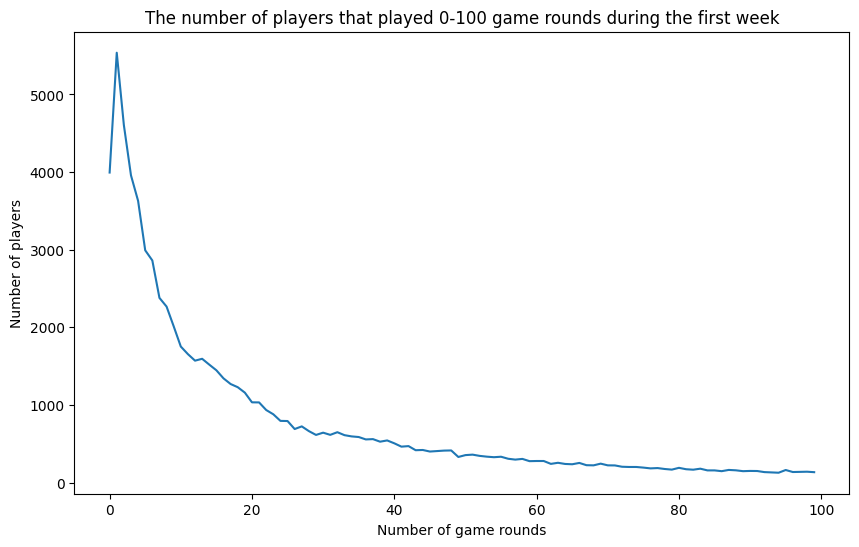

In [18]:
# Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title('The number of players that played 0-100 game rounds during the first week')
ax.set_xlabel('Number of game rounds')
ax.set_ylabel('Number of players')

In [19]:
df['retention_1'].mean()

np.float64(0.4452095044850259)

In [21]:
df.groupby('version')['retention_1'].mean()

,retention_1
version,
gate_30,0.4482
gate_40,0.4423
